In [ ]:
!pip install pytchat # liblary to get youtube chat log

#### Step1. Gather data, determine the method of data collection and provenance of the data 
#### Step2. Identify an Unsupervised Learning Problem

The goal of this project is to cluster Youtube Live comments through unsupervised learning and divide them into multiple meaningful clusters. This is expected to allow users to select and display only the types of comments they want to see from the large number of comments flowing in, or to summarize and review videos by type.
This time, as an example, we will acquire and analyze comments on MLB's Youtube Live to verify the extent to which the above objectives can be achieved.

MLB live: https://www.youtube.com/watch?v=SyQ2UZ9EF-k&ab_channel=MLB

In [16]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import NMF

In [ ]:
import pandas as pd
import pytchat
import time


livechat = pytchat.create(video_id = "SyQ2UZ9EF-k")# video_idはhttps://....watch?v=XXX

data = {
    'datetime' : [],
    'author.name' : [],
    'message' : [],
    'amountString' : [],
}

while livechat.is_alive():
    # get chat data
    chatdata = livechat.get()
    for c in chatdata.items:
        data['datetime'].append(c.datetime)
        data['author.name'].append(c.author.name)
        data['message'].append(c.message)
        print(f"{c.datetime} {c.author.name} {c.message} {c.amountString}")
    time.sleep(5)

There are too many comments, so we will stop collecting at the appropriate point

#### Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data (26 points)
Text is vectorized by tf-idf. We perform simple text data aggregation and visualization

In [11]:
df = pd.DataFrame(data)
df.to_csv('chatlog.csv', index=False) # save chat log as csv file
df.head()

,datetime,author.name,message
0,2022-09-02 02:32:56,Austin Kleschka,Hello everyone!!
1,2022-09-02 02:33:05,Hudgins Huddle,Lets go! Whats up everyone!
2,2022-09-02 02:33:07,dodgerfilms,Best wishes to Tony La Russa. Looking forward ...
3,2022-09-02 02:34:02,Benny No,Time for baseball!
4,2022-09-02 02:34:55,YouTube Viewers,Hey everyone! We'll be here again today to off...


In [20]:
df.size

4809

In [25]:
# vectorize chat log
vectorizer = TfidfVectorizer(
    analyzer='word',
    lowercase=True,
    stop_words='english',
    max_features=1000,
    max_df=0.5,
)

X = vectorizer.fit_transform(df['message'])
X.shape

(1603, 1000)

In [26]:
vectorizer.get_feature_names_out()

array(['00', '10', '100', '107', '15', '1800s', '1st', '20', '2022',
       '2023', '22', '23', '27', '2nd', '30', '50', '69', '69mega',
       'aaron', 'abreu', 'actually', 'ad', 'ads', 'ago', 'agree',
       'agreed', 'ain', 'aint', 'al', 'alonso', 'amazing', 'america',
       'angel', 'angeles', 'angels', 'announcer', 'announcers',
       'anonymous', 'anybody', 'anyways', 'appearances', 'ask', 'astros',
       'atm', 'audio', 'austin', 'award', 'away', 'awesome', 'axe',
       'baby', 'bad', 'ball', 'bankroll_064', 'base', 'baseball',
       'baseman', 'bat', 'bear', 'beast', 'beat', 'beats', 'beer',
       'believe', 'bengals', 'benny', 'best', 'bet', 'betta', 'better',
       'big', 'biggest', 'bigjim__11', 'black', 'blaze', 'blue', 'bobby',
       'bomb', 'boo', 'boone', 'boston', 'bot', 'boy', 'brandon',
       'braves', 'breakfast', 'brett', 'bring', 'bro', 'broadcast',
       'bruh', 'bryan', 'bubble', 'bull', 'bwj', 'bye', 'bóng', 'cairo',
       'calling', 'card', 'cardinal

In [27]:
vectorizer.get_feature_names_out()

array(['00', '10', '100', '107', '15', '1800s', '1st', '20', '2022',
       '2023', '22', '23', '27', '2nd', '30', '50', '69', '69mega',
       'aaron', 'abreu', 'actually', 'ad', 'ads', 'ago', 'agree',
       'agreed', 'ain', 'aint', 'al', 'alonso', 'amazing', 'america',
       'angel', 'angeles', 'angels', 'announcer', 'announcers',
       'anonymous', 'anybody', 'anyways', 'appearances', 'ask', 'astros',
       'atm', 'audio', 'austin', 'award', 'away', 'awesome', 'axe',
       'baby', 'bad', 'ball', 'bankroll_064', 'base', 'baseball',
       'baseman', 'bat', 'bear', 'beast', 'beat', 'beats', 'beer',
       'believe', 'bengals', 'benny', 'best', 'bet', 'betta', 'better',
       'big', 'biggest', 'bigjim__11', 'black', 'blaze', 'blue', 'bobby',
       'bomb', 'boo', 'boone', 'boston', 'bot', 'boy', 'brandon',
       'braves', 'breakfast', 'brett', 'bring', 'bro', 'broadcast',
       'bruh', 'bryan', 'bubble', 'bull', 'bwj', 'bye', 'bóng', 'cairo',
       'calling', 'card', 'cardinal

There are some numbers and non-english words, so we delete them using Regular Expression

In [28]:
# remove non-english words and numbers by using regular expression
import re

def remove_non_english_words(text):
    return re.sub('[^a-zA-Z]', ' ', text)

df['message'] = df['message'].apply(remove_non_english_words)

# vectorize chat log
vectorizer = TfidfVectorizer(
    analyzer='word',
    lowercase=True,
    stop_words='english',
    max_features=1000,
    max_df=0.5,
)

X = vectorizer.fit_transform(df['message'])

vectorizer.get_feature_names_out()

array(['aaron', 'abreu', 'actually', 'ad', 'ads', 'ago', 'agree',
       'agreed', 'ain', 'aint', 'al', 'alonso', 'amazing', 'america',
       'angel', 'angeles', 'angels', 'announcer', 'announcers',
       'anonymous', 'anybody', 'anyways', 'appearances', 'ask', 'astros',
       'atm', 'audio', 'austin', 'award', 'away', 'awesome', 'axe',
       'baby', 'bad', 'ball', 'bankroll', 'base', 'baseball', 'baseman',
       'bat', 'bear', 'beast', 'beat', 'beats', 'beer', 'believe',
       'bengals', 'benny', 'best', 'bet', 'betta', 'better', 'big',
       'biggest', 'bigjim', 'black', 'blaze', 'blue', 'bobby', 'bomb',
       'boo', 'boone', 'boston', 'bot', 'boy', 'brandon', 'braves',
       'breakfast', 'brett', 'bring', 'bro', 'broadcast', 'bruh', 'bryan',
       'bubble', 'bull', 'bwj', 'bye', 'cairo', 'calling', 'card',
       'cardinals', 'cardnials', 'cards', 'care', 'careful', 'catch',
       'catcher', 'caught', 'cause', 'cease', 'central', 'ch', 'champs',
       'chapman', 'chat', 

It looks good. Let's visualize words with high tf-idf.

In [30]:
# words with high tf-idf score
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf.mean().sort_values(ascending=False).head(20)

sox       0.045927
royals    0.034980
let       0.024200
white     0.022669
lets      0.020850
cueto     0.014698
nice      0.014449
lol       0.013047
good      0.012629
catch     0.012357
hi        0.011614
kc        0.010976
win       0.010611
face      0.009734
like      0.009463
game      0.009280
nrfi      0.008792
hit       0.008017
yes       0.007950
fan       0.007431
dtype: float64

#### Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions (70 points)
1. Clustering chat log data using three methods: K-means, Hierarchical Clustering, and Matrix Factorizarion.
2. The number of clusters is determined by using the Elbow method.
3. For the clusters created by each model, the labels of the clusters are examined by visualizing frequently occurring words and creating summaries using ChatGPT.




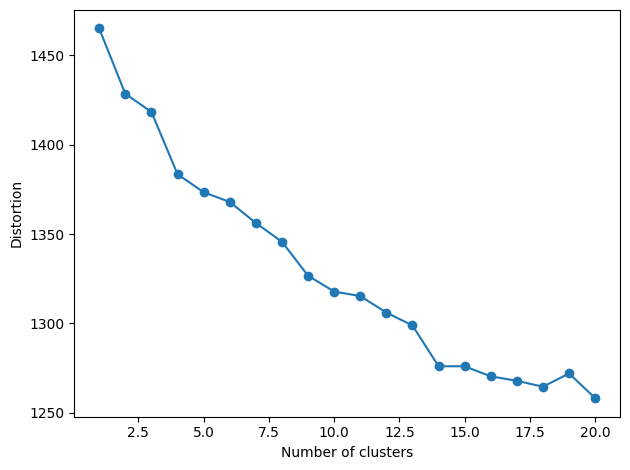

In [53]:
# Clustering by K-means, Hierarchical Clustering, and NMF
# K-means and elbow method
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [54]:
n_labels = 4

# K-means
km = KMeans(n_clusters=n_labels, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(X)

In [55]:
# Hierarchical Clustering
ac = AgglomerativeClustering(
    n_clusters=4,
    affinity='euclidean',
    linkage='complete',
)
y_hc = ac.fit_predict(X.toarray())

/Users/kiro02/Library/Caches/pypoetry/virtualenvs/cub-2023oct-tIHWYxGD-py3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


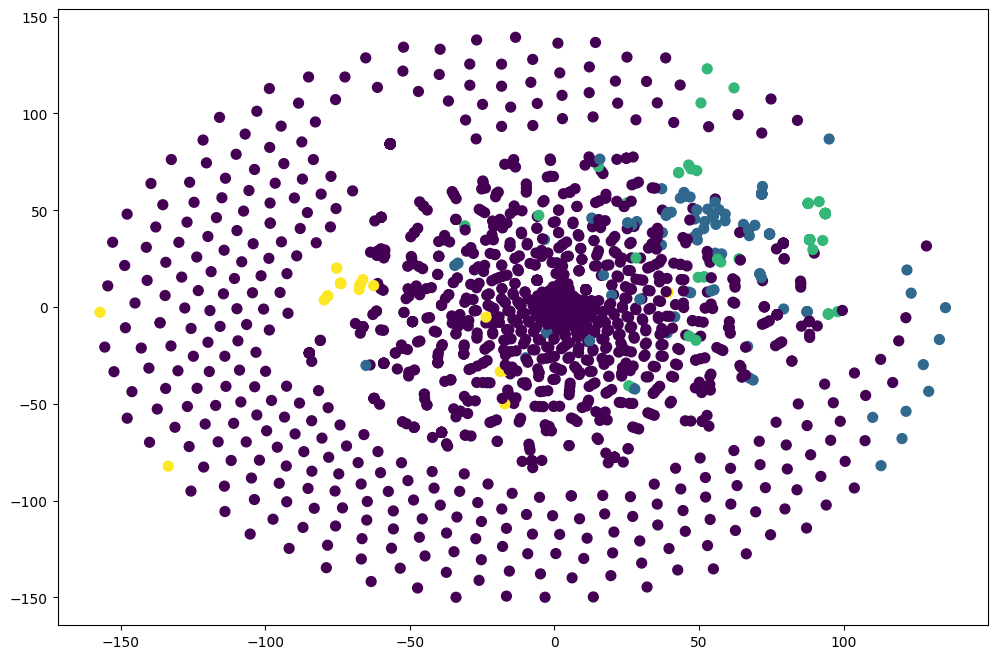

In [56]:
# NMF
nmf = NMF(n_components=n_labels, init='random', random_state=0)
y_nmf = nmf.fit_transform(X)

# TSNE for visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.toarray())

# plot K-means result
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_km, s=50, cmap='viridis')

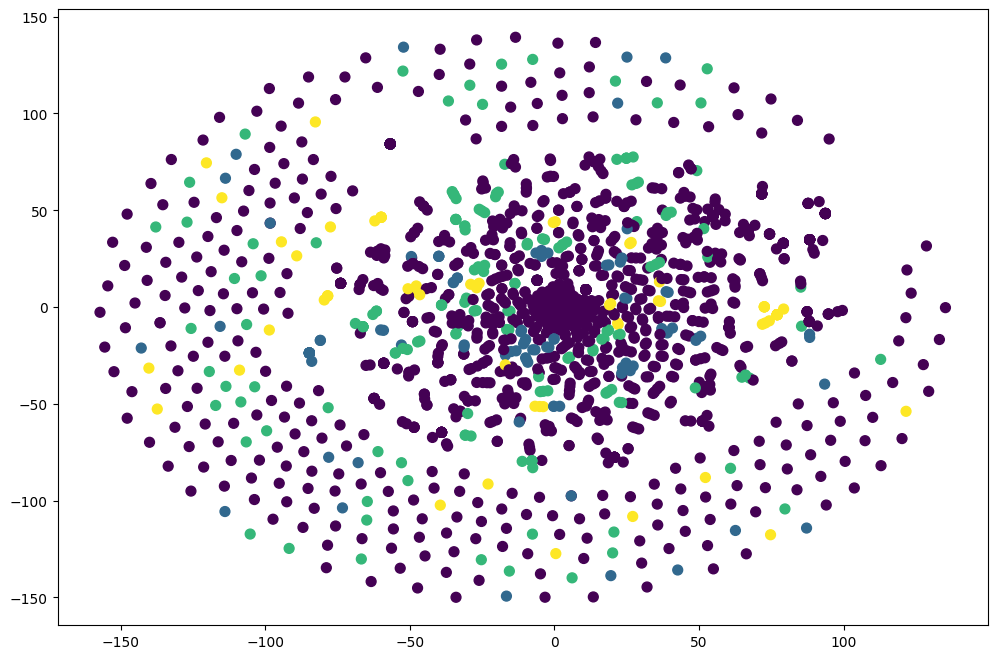

In [57]:
# plot Hierarchical Clustering result
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_hc, s=50, cmap='viridis')

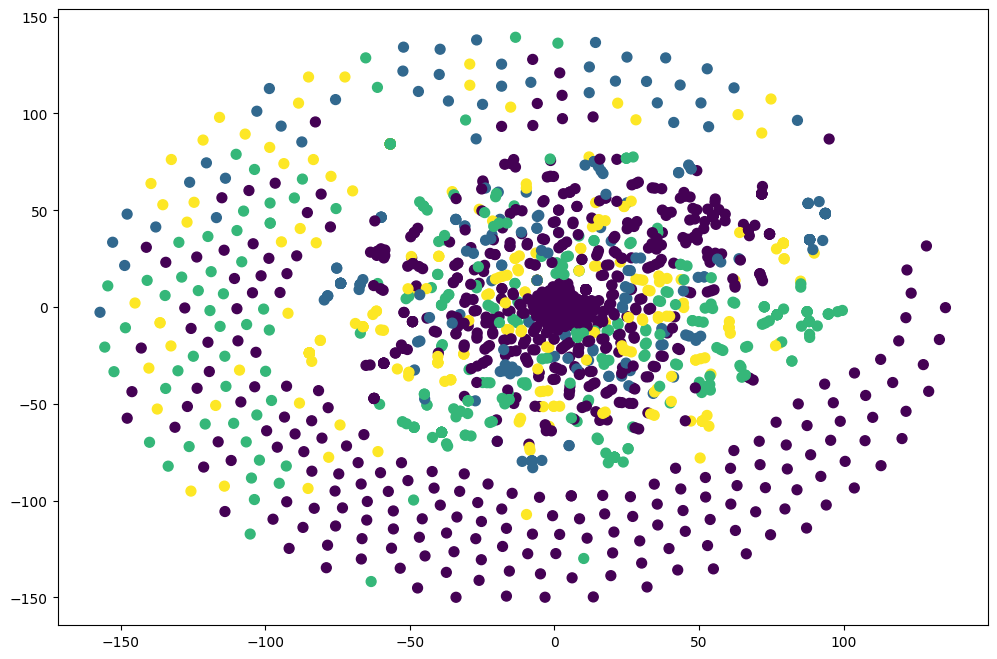

In [58]:
# plot NMF result
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_nmf.argmax(axis=1), s=50, cmap='viridis')

Visualization by TSNE does not appear to be a good way to determine clustering. Visualize frequent words for each cluster

In [59]:
# Visualization by TSNE does not appear to be a good way to determine clustering. Visualize frequent words for each cluster
# K-means
vectorizer_count = CountVectorizer(
    analyzer='word',
    lowercase=True,
    stop_words='english',
    max_features=1000,
    max_df=0.5,
)

X_count = vectorizer_count.fit_transform(df['message'])

df_count = pd.DataFrame(X_count.toarray(), columns=vectorizer_count.get_feature_names_out())
df_count['cluster_km'] = y_km
df_count.groupby('cluster_km').mean().T.sort_values(0, ascending=False).head(20)

cluster_km,0,1,2,3
face,0.038212,0.008403,0.000000,0.035714
cueto,0.035328,0.016807,0.000000,0.000000
sox,0.033886,1.050420,0.101449,0.035714
lol,0.033165,0.008403,0.014493,0.000000
lets,0.030281,0.058824,0.072464,0.000000
good,0.028118,0.008403,0.014493,0.214286
like,0.025234,0.025210,0.000000,0.000000
let,0.024513,0.126050,0.202899,0.000000
game,0.023792,0.025210,0.000000,0.000000
nice,0.023792,0.000000,0.000000,0.035714


In [60]:
# Hierarchical Clustering
df_count['cluster_hc'] = y_hc
df_count.groupby('cluster_hc').mean().T.sort_values(0, ascending=False).head(20)

cluster_hc,0,1,2,3
cluster_km,0.2392,0.085714,0.106742,0.200000
sox,0.1256,0.057143,0.084270,0.028571
royals,0.0696,0.038095,0.056180,0.000000
white,0.0624,0.019048,0.022472,0.014286
let,0.0480,0.028571,0.000000,0.000000
face,0.0432,0.009524,0.000000,0.000000
cueto,0.0368,0.009524,0.022472,0.000000
lol,0.0336,0.009524,0.022472,0.014286
good,0.0336,0.019048,0.016854,0.000000
lets,0.0296,0.009524,0.011236,0.200000


In [61]:
# NMF
df_count['cluster_nmf'] = y_nmf.argmax(axis=1)
df_count.groupby('cluster_nmf').mean().T.sort_values(0, ascending=False).head(20)

cluster_nmf,0,1,2,3
cluster_hc,0.350832,0.506608,0.454545,0.498113
sox,0.212548,0.030837,0.021212,0.000000
cluster_km,0.153649,0.859031,0.078788,0.000000
white,0.107554,0.000000,0.000000,0.003774
lol,0.052497,0.017621,0.003030,0.007547
face,0.049936,0.004405,0.024242,0.026415
like,0.044814,0.004405,0.003030,0.003774
win,0.043534,0.026432,0.000000,0.000000
game,0.042254,0.004405,0.003030,0.003774
fan,0.032010,0.022026,0.000000,0.000000


In [66]:
# get label for each cluster using openAI chat API
# use NMF result
import openai

df['cluster'] = y_nmf.argmax(axis=1)
texts = df.groupby('cluster')['message'].sum()
texts.to_csv('texts.csv', index=False)

In [68]:
texts

cluster
0    Best wishes to Tony La Russa  Looking forward ...
1    Ha  love a good gazelle reference  Even if it ...
2    Lets go  Whats up everyone More hidden ball tr...
3    Hello everyone  Time for baseball  Day basebal...
Name: message, dtype: object

prompt: Summarize each row into one phrase title

<img src="chatGPT.png">

This shows that categories 3 and 4 are voices of excitement and greetings, so those who think such information is unnecessary may consider creating a feature that mutes them